<a href="https://colab.research.google.com/github/Andiko-K/Wine-Quality-Ansys/blob/main/Wine_Quality_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Wine Quality Index Using Machine Learning

## Business Problem

## Problem Statement

> Wineries represent a broad industry offering numerous career opportunities, with substantial growth observed in recent years. Thus, ensuring consistent assessment of product quality is crucial to maintain standards, inform market decisions, and uphold consistency.  Machine learning presents a promising solution to enhance the accuracy of wine quality evaluation and decision-making processes.

## Business Objective

> Determine factors that contributes on wine qualities based on chemical composition and physical attributes.

## Business Metrics

> Measure the accuracy of model's prediction with different wines to ensure its consistency.

## Datasets

> Dataset acquired from <a href = "https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/code">Wine Quality Dataset</a> which related to red variants of Portuguese "Vinho Verde"



## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

import gdown
import os


## Assessing Datasets

Dataset contains physiochemical (inputs) and sensory (the output) variables of the wine. However, due to privacy and logistic issues, there is no data about grape types, wine brand, wine selling price and similar.

The available input variables are listed below:

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):
12. quality (score between 0 and 10)

### Installing The Dataset

In [2]:
!gdown --id 1LcU9PvCbWjOSCQBhNn_9wMgpVL-pTcln

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LcU9PvCbWjOSCQBhNn_9wMgpVL-pTcln
To: /content/WineQT.csv
100% 78.1k/78.1k [00:00<00:00, 61.8MB/s]


In [3]:
os.mkdir('./dataset')
os.rename('WineQT.csv', './dataset/WineQT.csv')

### Data Wrangling

In [4]:
wine_df_raw = pd.read_csv('./dataset/WineQT.csv')

In [5]:
wine_df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
wine_df_raw.drop('Id', axis = 1, inplace = True)

In [7]:
wine_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


## Cleaning Outliers

In [8]:
#Function
def outlier_plot(column):
  """
  Returns boxplot and histogram of a column with respect to quality
  with two condition: before any outlier treatments and after outlier treatments.
  Outlier is treated using np.log() thus localizing the data

  Args:
  column: a column within wine_df_raw EXCEPT 'quality' that would like to be
          assessed
  """
  data = wine_df_raw[column]

  fig,ax = plt.subplots(2,2,figsize = (9,6))

  sb.boxplot(x = wine_df_raw['quality'], y = data, ax = ax[0][0],
             palette = 'flare', hue = wine_df_raw['quality'], legend = False)
  sb.histplot(data, ax = ax[0][1], kde = True, color = 'red')

  sb.boxplot(x = wine_df_raw['quality'], y = np.log(data), ax = ax[1][0],
             palette = 'crest', hue = wine_df_raw['quality'], legend = False)
  sb.histplot(np.log(data), ax = ax[1][1], kde = True, color = 'blue')

  fig.suptitle(f'Distribution of {column} Before vs Treatment')
  plt.show()


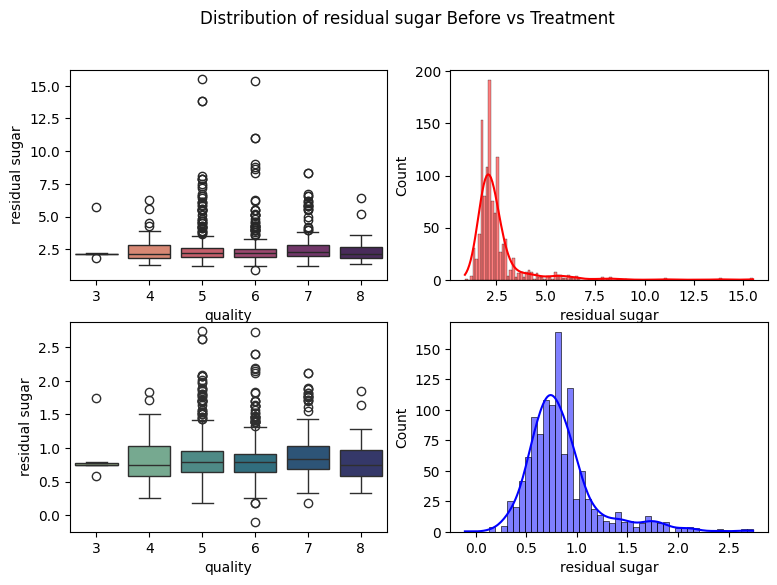

In [9]:
outlier_plot('residual sugar')

In [10]:
wine_df = wine_df_raw.copy()
for column in wine_df.columns:
  if column not in ['quality', 'citric acid']:
    wine_df[column] = np.log(wine_df[column])
#Due to runtime error, citric acid won't be treated

## Analyzing Data

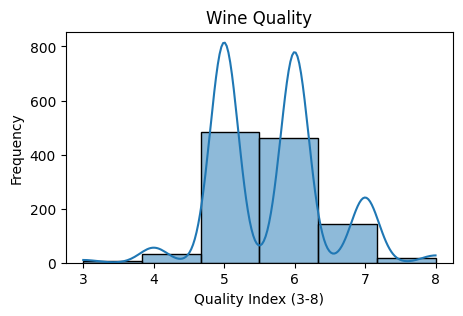

In [11]:
#Analyzing Frequency of each Wine Quality
plt.figure(figsize = (5,3))
sb.histplot(wine_df['quality'],  bins = 6, kde = True)

plt.title("Wine Quality")
plt.xlabel("Quality Index (3-8)")
plt.ylabel("Frequency")

plt.show()

Insight from above graph: Quality Index is considered to be distributed normally. There are insufficient data for wine with low and high index quality

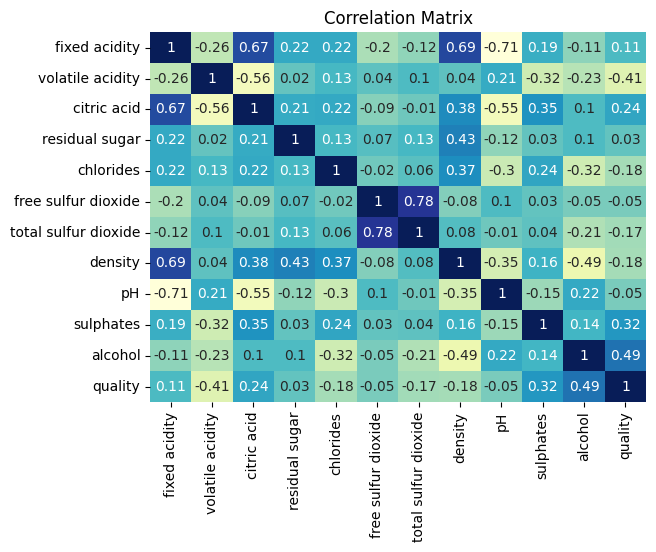

In [12]:
#Correlation Matrix
sb.heatmap(wine_df.corr().round(2), cmap='YlGnBu', cbar=False, annot = True)
plt.title('Correlation Matrix')
plt.show()

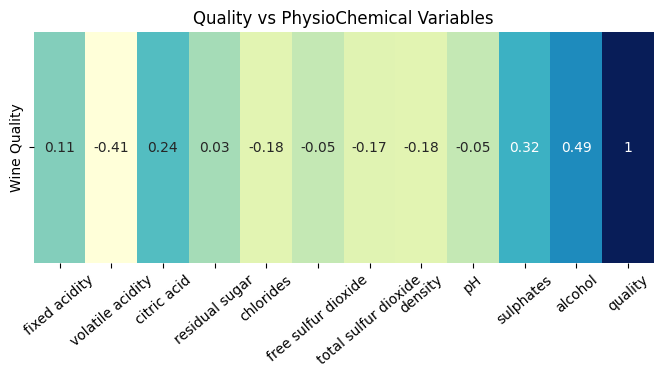

In [13]:
plt.figure(figsize = (8,3))

data_2d = np.array(wine_df.corr()['quality'].round(2)).reshape(1,-1)
sb.heatmap(data_2d, cmap='YlGnBu', cbar=False, annot = True)

plt.title('Quality vs PhysioChemical Variables')
plt.yticks([.5], ['Wine Quality'])
plt.xticks(.5 + np.arange(0,12), [column for column in wine_df.columns], rotation = 40)

plt.show()

Insight from above graph:

- Alcohol has the highest positive correlation with Quality Index
- Suphates and Citric Acid has the second highest positive correlation
- Fixed Acidity is the third highest
- Volatile Acidity has the highest negative correlation with Quality Index
- Total Sulfur Dioxide, Density, and Chlorides followed respectively
- Residual Sugar, Free Sulfur Dioxides, and pH have little correlation with Quality Index

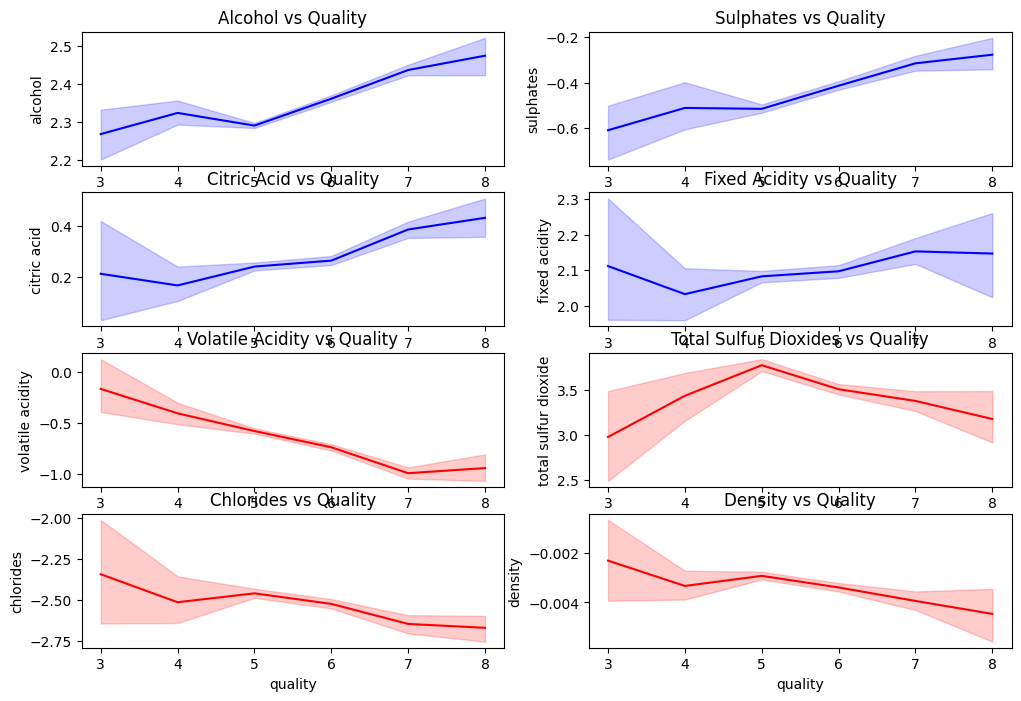

In [14]:
#INSPECTION FOR VARIABLES WITH HIGH CORRELATION

fig, ax = plt.subplots(4,2, figsize = (12,8))
plt.plot()

sb.lineplot(x=wine_df['quality'], y=wine_df['alcohol'], ax=ax[0][0],
            color = 'blue')
ax[0][0].set_title('Alcohol vs Quality')
sb.lineplot(x=wine_df['quality'], y=wine_df['sulphates'], ax=ax[0][1],
            color = 'blue')
ax[0][1].set_title('Sulphates vs Quality')
sb.lineplot(x=wine_df['quality'], y=wine_df['citric acid'], ax=ax[1][0],
            color = 'blue')
ax[1][0].set_title('Citric Acid vs Quality')
sb.lineplot(x=wine_df['quality'], y=wine_df['fixed acidity'], ax=ax[1][1],
            color = 'blue')
ax[1][1].set_title('Fixed Acidity vs Quality')

sb.lineplot(x=wine_df['quality'], y=wine_df['volatile acidity'], ax=ax[2][0],
            color = 'red')
ax[2][0].set_title('Volatile Acidity vs Quality')
sb.lineplot(x=wine_df['quality'], y=wine_df['total sulfur dioxide'], ax=ax[2][1],
            color = 'red')
ax[2][1].set_title('Total Sulfur Dioxides vs Quality')
sb.lineplot(x=wine_df['quality'], y=wine_df['chlorides'], ax=ax[3][0],
            color = 'red')
ax[3][0].set_title('Chlorides vs Quality')
sb.lineplot(x=wine_df['quality'], y=wine_df['density'], ax=ax[3][1],
            color = 'red')
ax[3][1].set_title('Density vs Quality')
plt.show()

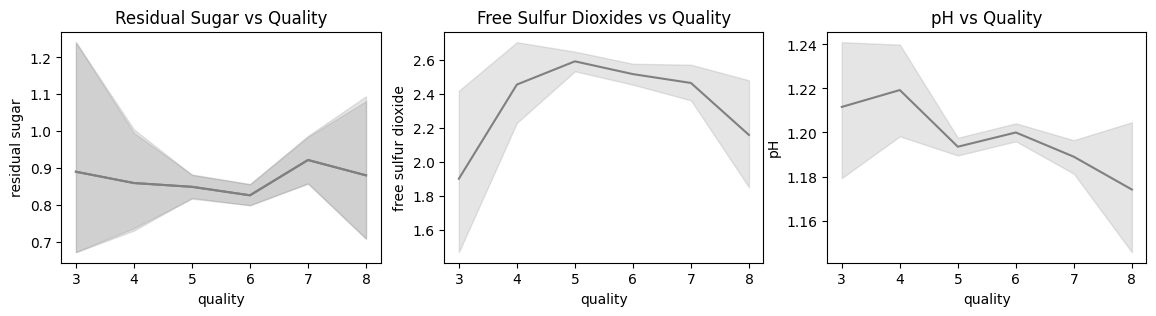

In [15]:
#INSPECTION FOR VARIABLES WITH LOW CORRELATION

fig, ax = plt.subplots(1,3, figsize = (14, 3))
plt.plot()

sb.lineplot(x=wine_df['quality'], y=wine_df['residual sugar'], ax=ax[0],
            color = 'gray')
sb.lineplot(x=wine_df['quality'], y=wine_df['residual sugar'], ax=ax[0],
            color = 'gray')
ax[0].set_title('Residual Sugar vs Quality')
sb.lineplot(x=wine_df['quality'], y=wine_df['free sulfur dioxide'], ax=ax[1],
            color = 'gray')
ax[1].set_title('Free Sulfur Dioxides vs Quality')
sb.lineplot(x=wine_df['quality'], y=wine_df['pH'], ax=ax[2],
            color = 'gray')
ax[2].set_title('pH vs Quality')

plt.show()

Insight: Residual Sugar will be dropped due to high outlier and litle relevance with quality index to avoid overfitting

## Data Preparation

In [16]:
x_resampled = wine_df.drop(['quality', 'residual sugar'], axis = 1).to_numpy()
y_resampled = wine_df['quality'].to_numpy() - 3 #Change to_categorical from 0-5

#SMOTE oversampling for x_resampled
smote = SMOTE(sampling_strategy = 'auto')
x_resampled, y_resampled = smote.fit_resample(x_resampled, y_resampled)

#Split data for train and test
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled,
                            test_size=0.2, stratify = y_resampled)

## Initialize Model

In [18]:
#model initialization
wine_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = ((10,))),
    tf.keras.layers.Dense(64, activation = 'relu',
      kernel_regularizer = tf.keras.regularizers.L2(.1)),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(6)
])

wine_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ['accuracy'])

In [19]:
wine_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 6)                 66        
                                                                 
Total params: 5580 (21.80 KB)
Trainable params: 5580 (21.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Architecture

In [20]:
os.mkdir("./model")

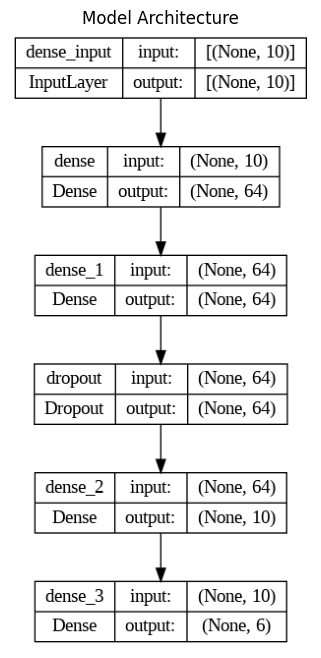

In [21]:
file_name = "model/model_architecture.png"

tf.keras.utils.plot_model(wine_model, to_file = file_name,
                          show_shapes = True, show_layer_names = True)
plt.figure(figsize = (8,8))
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Model Architecture')
plt.axis('off')
plt.savefig(file_name)
plt.show()

## Callbacks

In [22]:
checkpoint_filepath = '../tmp/model/wine_model.h5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,     # Save only the best model
    mode='max',              # Save the model with the highest validation accuracy
    verbose=1
)

## Model Fitting

In [23]:
history = wine_model.fit(x_train, y_train, epochs = 1000, batch_size = 64,
               validation_data = (x_test, y_test), callbacks = [model_checkpoint_callback])

Epoch 1/1000
23/37 [=================>............] - ETA: 0s - loss: 7.2339 - accuracy: 0.2024 
Epoch 1: val_accuracy improved from -inf to 0.37586, saving model to ../tmp/model/wine_model.h5
37/37 [==============================] - 1s 12ms/step - loss: 6.7614 - accuracy: 0.2170 - val_loss: 5.4563 - val_accuracy: 0.3759
Epoch 2/1000
32/37 [========================>.....] - ETA: 0s - loss: 4.7024 - accuracy: 0.3032

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.37586
37/37 [==============================] - 0s 6ms/step - loss: 4.6144 - accuracy: 0.3046 - val_loss: 3.8283 - val_accuracy: 0.3241
Epoch 3/1000
34/37 [==========================>...] - ETA: 0s - loss: 3.3544 - accuracy: 0.3281
Epoch 3: val_accuracy did not improve from 0.37586
37/37 [==============================] - 0s 5ms/step - loss: 3.3265 - accuracy: 0.3296 - val_loss: 2.8563 - val_accuracy: 0.3103
Epoch 4/1000
31/37 [========================>.....] - ETA: 0s - loss: 2.6041 - accuracy: 0.3342
Epoch 4: val_accuracy improved from 0.37586 to 0.39483, saving model to ../tmp/model/wine_model.h5
37/37 [==============================] - 0s 6ms/step - loss: 2.5655 - accuracy: 0.3395 - val_loss: 2.2725 - val_accuracy: 0.3948
Epoch 5/1000
32/37 [========================>.....] - ETA: 0s - loss: 2.1150 - accuracy: 0.3530
Epoch 5: val_accuracy did not improve from 0.39483
37/37 [==============================] - 0s 5ms/step - loss: 2.0988 - ac

In [24]:
wine_model_checkpoint = tf.keras.models.load_model(checkpoint_filepath)

In [34]:
val_loss, val_accuracy = wine_model_checkpoint.evaluate(x_test, y_test)

print("Validation Loss:", round(val_loss, 2))
print("Validation Accuracy:", round(val_accuracy, 2))

19/19 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.8155
Validation Loss: 0.56
Validation Accuracy: 0.82


## Analyze Loss and Accuracy Curve

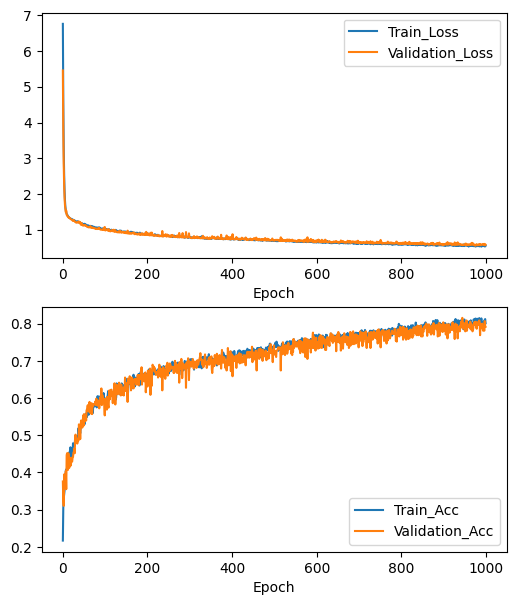

In [26]:
fig, ax = plt.subplots(2,1, figsize = (6,7))
ax[0].plot(history.history['loss'], label = 'Train_Loss')
ax[0].plot(history.history['val_loss'], label = 'Validation_Loss')
ax[0].legend(); ax[0].set_xlabel('Epoch')

ax[1].plot(history.history['accuracy'], label = 'Train_Acc')
ax[1].plot(history.history['val_accuracy'], label = 'Validation_Acc')
ax[1].legend(); ax[1].set_xlabel('Epoch')

plt.show()

## Confusion Matrix

19/19 [==============================] - 0s 3ms/step


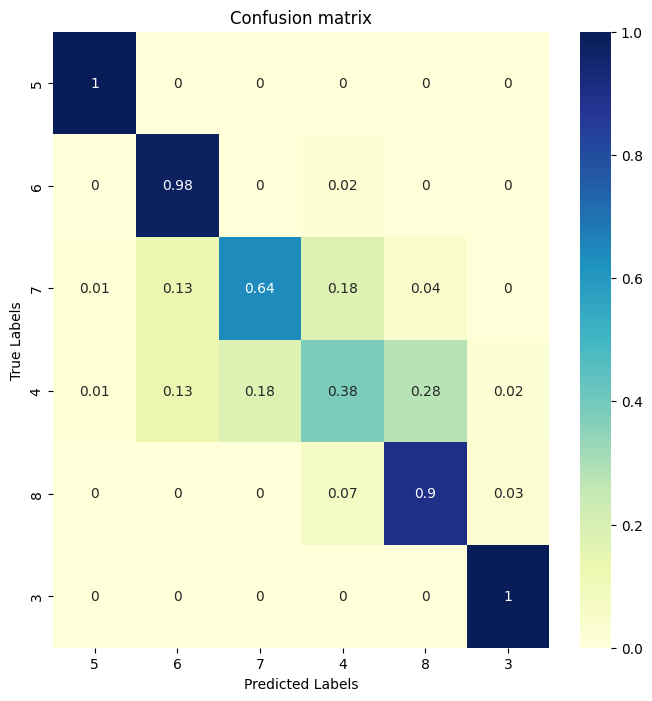

In [27]:
y_pred = np.argmax(wine_model_checkpoint.predict(x_test), axis = 1)
cm = confusion_matrix(y_test, y_pred)
cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
labels = [str(label) for label in wine_df['quality'].unique()]

#Plot Confusion Matrix
plt.figure(figsize = (8,8))
sb.heatmap(cm, annot = True, cmap = 'YlGnBu',
           xticklabels = labels, yticklabels = labels )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix')
plt.show()

## Saving The Model

In [30]:
# Save Current Model
model_path = "./model/wine_model.h5"
wine_model_checkpoint.save(model_path)